# Explore here

Paso 1: Cargamos los datos y separamos

In [2]:
# Your code here
import pandas as pd
from sklearn.model_selection import train_test_split

# Cargar datos
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
df = pd.read_csv(url)

# Seleccionamos solo las columnas necesarias
df = df[['Latitude', 'Longitude', 'MedInc']]

# Dividir entre train y test (80/20)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


Paso 2: Construimos K-Means


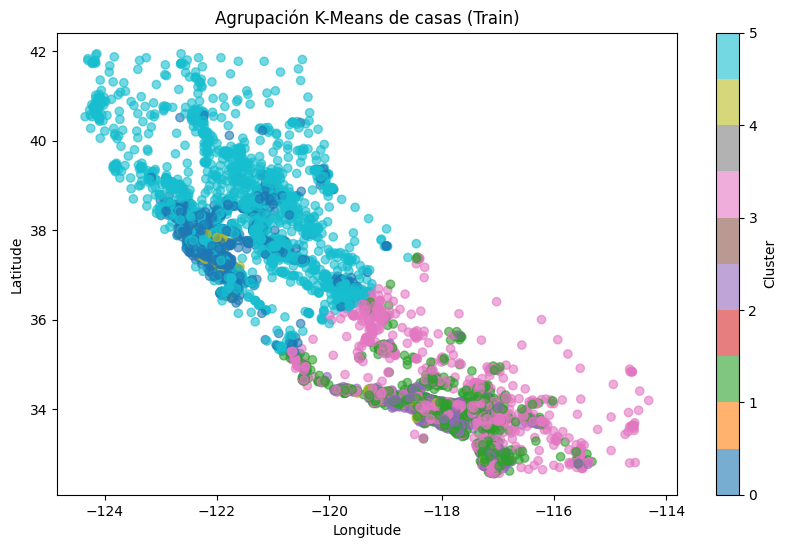

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Entrenamos modelo K-Means con 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
train_clusters = kmeans.fit_predict(train_df)

# Añadir columna de cluster al train
train_df['cluster'] = train_clusters

# Graficar clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(train_df['Longitude'], train_df['Latitude'], c=train_df['cluster'], cmap='tab10', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('Agrupación K-Means de casas (Train)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Paso 3: Prediccion con el conjunto de test

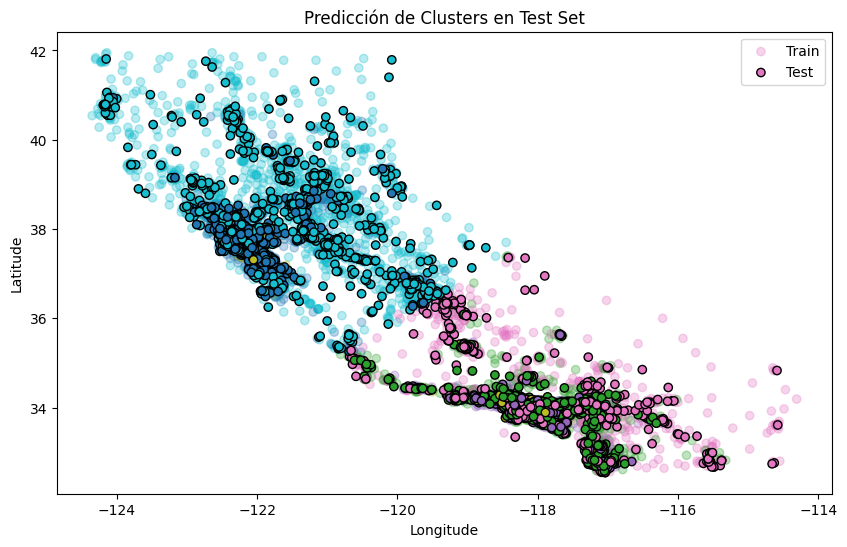

In [5]:
# Predecir con modelo KMeans en test
test_clusters = kmeans.predict(test_df)

# Añadir cluster al test
test_df['cluster'] = test_clusters

# Graficar los nuevos puntos
plt.figure(figsize=(10, 6))
# Plot puntos train
plt.scatter(train_df['Longitude'], train_df['Latitude'], c=train_df['cluster'], cmap='tab10', alpha=0.3, label='Train')
# Plot puntos test
plt.scatter(test_df['Longitude'], test_df['Latitude'], c=test_df['cluster'], cmap='tab10', edgecolor='black', label='Test')
plt.legend()
plt.title('Predicción de Clusters en Test Set')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Paso 4: Contruimos modelo de Clasificacion no Supervisada


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Variables y etiquetas
X_train = train_df[['Latitude', 'Longitude', 'MedInc']]
y_train = train_df['cluster']
X_test = test_df[['Latitude', 'Longitude', 'MedInc']]
y_test = test_df['cluster']

# Entrenamiento modelo supervisado
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       561
           1       1.00      0.99      1.00       983
           2       1.00      0.99      0.99       299
           3       0.99      1.00      0.99      1111
           4       0.94      0.98      0.96        62
           5       1.00      0.99      1.00      1112

    accuracy                           0.99      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       0.99      0.99      0.99      4128



In [9]:
import os
import joblib

# Crear carpeta si no existe
os.makedirs('models', exist_ok=True)

# Guardar modelos
joblib.dump(kmeans, 'models/kmeans_model.pkl')
joblib.dump(clf, 'models/classification_model.pkl')



['models/classification_model.pkl']